In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Exploratory Data Analysis**

Summary Statistics

In [6]:
print(f"Dataset shape: {data.shape}")
print("Missing values in each column:")
print(data.isnull().sum())
print("Summary statistics:")
print(data.describe())
print("Data types and non-null counts:")
print(data.info())

Dataset shape: (1338, 7)
Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Summary statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-nul

Univariate Analysis

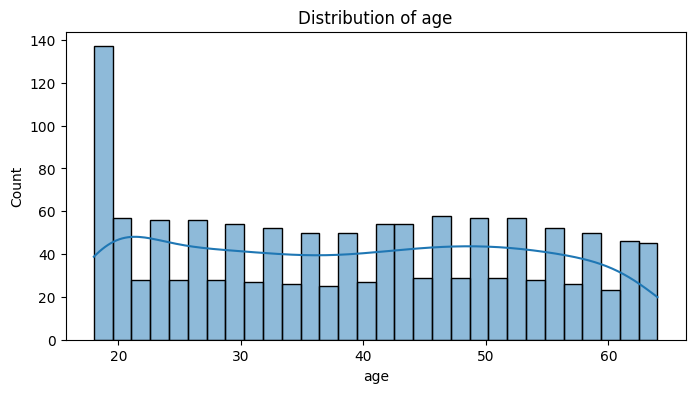

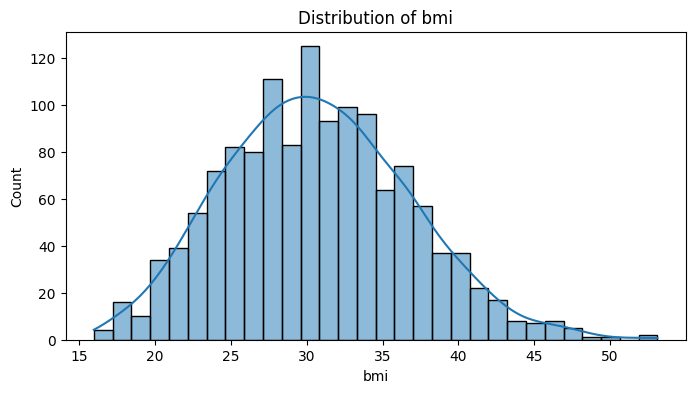

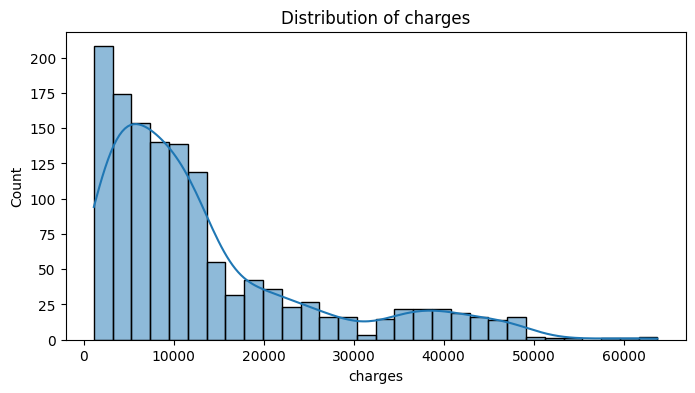

In [9]:
numerical_features = ['age', 'bmi', 'charges']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

C:\Users\asadf\AppData\Local\Temp\ipykernel_2676\1825828327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='pastel')


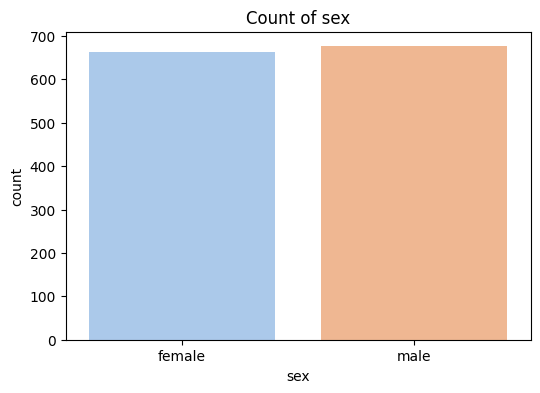

C:\Users\asadf\AppData\Local\Temp\ipykernel_2676\1825828327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='pastel')


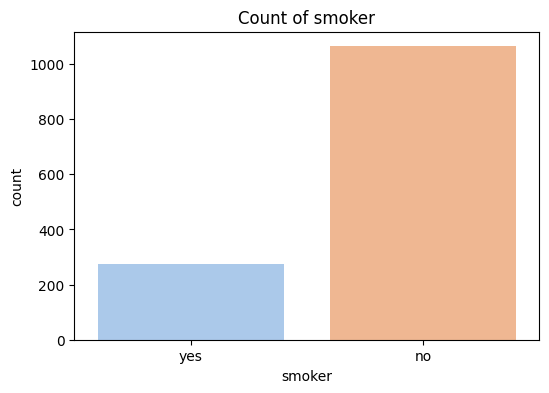

C:\Users\asadf\AppData\Local\Temp\ipykernel_2676\1825828327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='pastel')


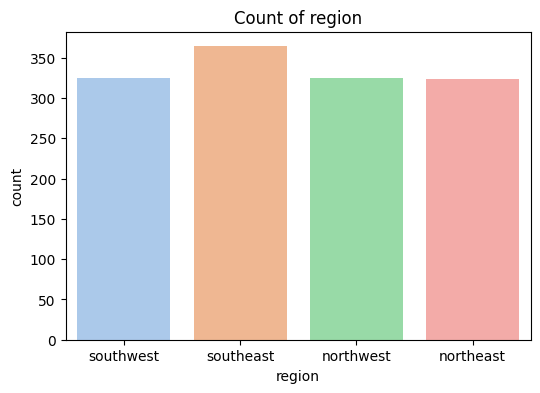

In [10]:
categorical_features = ['sex', 'smoker', 'region']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[feature], palette='pastel')
    plt.title(f'Count of {feature}')
    plt.show()

Bivariate analysis

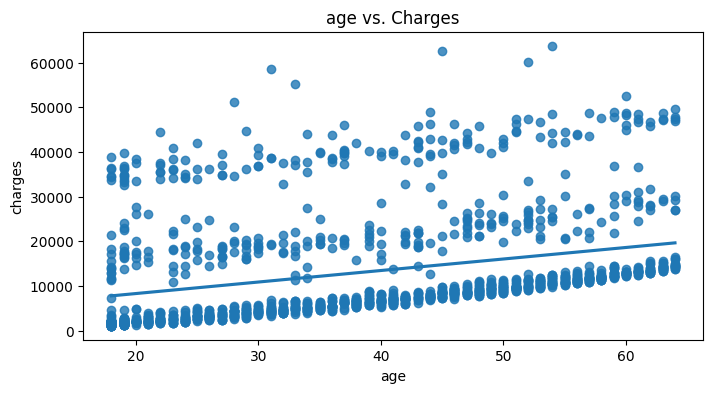

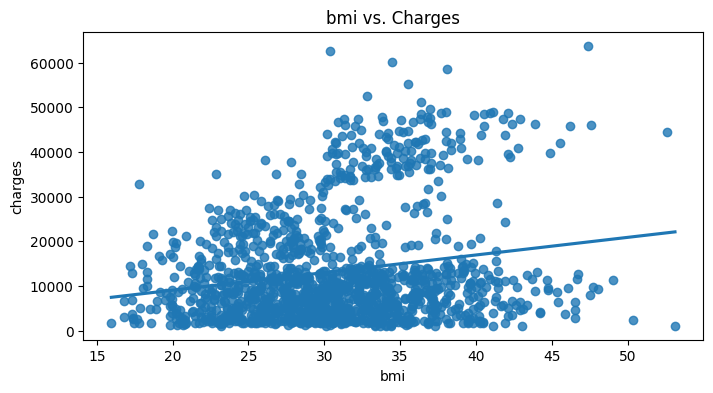

In [13]:
continuous_features = ['age', 'bmi']
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.regplot(x=data[feature], y=data['charges'], ci=None)
    plt.title(f'{feature} vs. Charges')
    plt.show()

In [18]:
age_vs_charges = ols("charges~age", data = data).fit()
print(age_vs_charges.params)

Intercept    3165.885006
age           257.722619
dtype: float64


In [21]:
bmi_vs_charges =ols("charges~bmi", data = data).fit()
print(bmi_vs_charges.params)

Intercept    1192.937209
bmi           393.873031
dtype: float64


C:\Users\asadf\AppData\Local\Temp\ipykernel_2676\2679748073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data['charges'], palette='pastel')


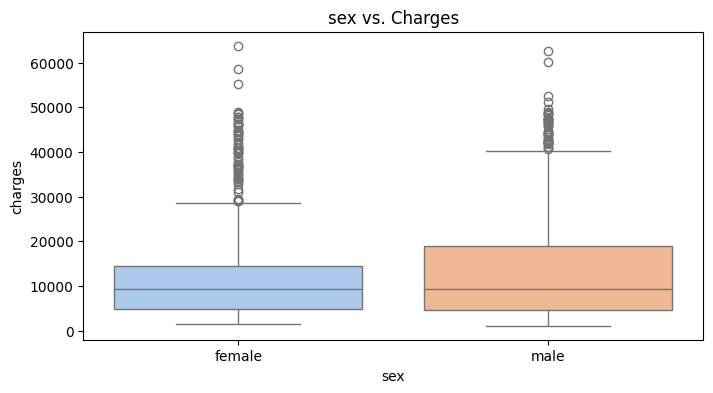

C:\Users\asadf\AppData\Local\Temp\ipykernel_2676\2679748073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data['charges'], palette='pastel')


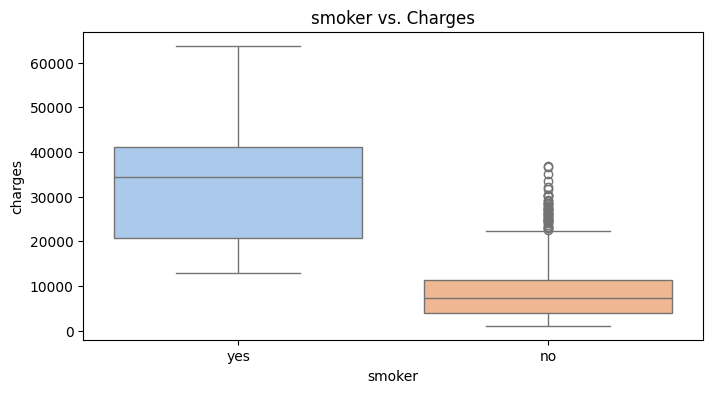

C:\Users\asadf\AppData\Local\Temp\ipykernel_2676\2679748073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data['charges'], palette='pastel')


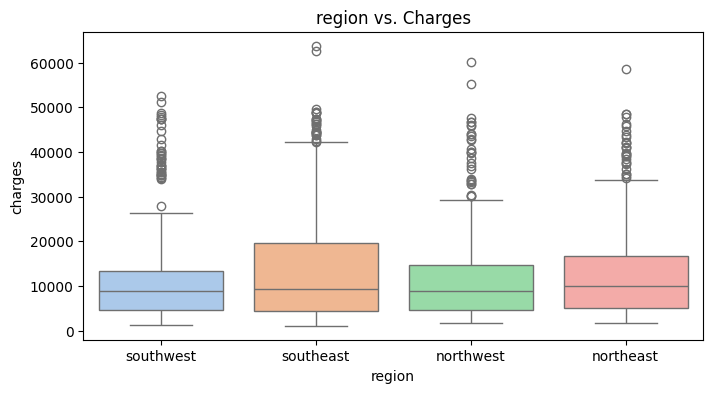

In [14]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature], y=data['charges'], palette='pastel')
    plt.title(f'{feature} vs. Charges')
    plt.show()


Correlation Analysis

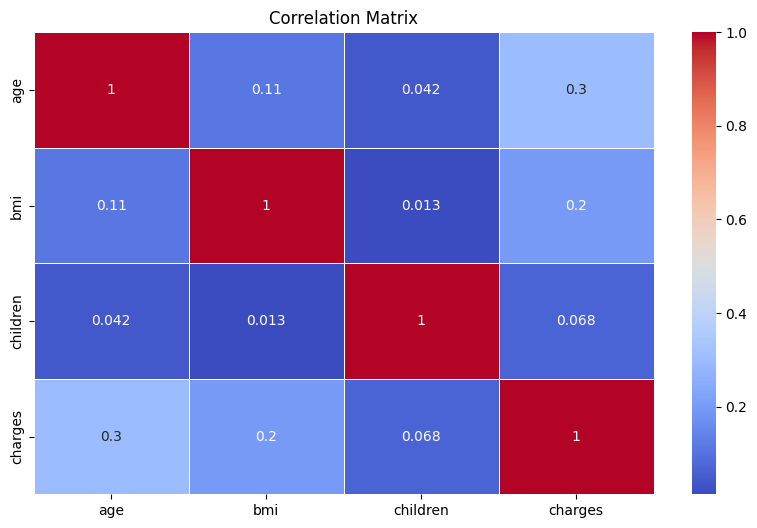

In [23]:
numerical_data = data.select_dtypes(include=[np.number]) 

corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Model Building**

In [25]:
data = pd.get_dummies(data, drop_first=True)

X = data.drop('charges', axis=1)  
y = data['charges'] 

scaler = StandardScaler()
X[['age', 'bmi', 'children']] = scaler.fit_transform(X[['age', 'bmi', 'children']])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Baseline Linear Regression

In [29]:
linear_model = LinearRegression()


linear_model.fit(X_train, y_train)


y_pred = linear_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19
R^2 Score: 0.78


Ridge regression

In [30]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)


ridge_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R^2 Score: {r2_ridge:.2f}")


Ridge Regression Model Performance:
Mean Squared Error (MSE): 33645391.30
Mean Absolute Error (MAE): 4193.18
R^2 Score: 0.78


Lasso Regression Model

In [35]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha=0.1)


lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"R^2 Score: {r2_lasso:.2f}")


Lasso Regression Model Performance:
Mean Squared Error (MSE): 33597788.88
Mean Absolute Error (MAE): 4181.30
R^2 Score: 0.78


Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor


tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)


tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"R^2 Score: {r2_tree:.2f}")


Decision Tree Regression Model Performance:
Mean Squared Error (MSE): 24270288.99
Mean Absolute Error (MAE): 2869.63
R^2 Score: 0.84


**Hyperparameter Tuning**

In [38]:
from sklearn.model_selection import GridSearchCV


param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}


grid_search_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')


grid_search_ridge.fit(X_train, y_train)


print(f"Best Parameters for Ridge Regression: {grid_search_ridge.best_params_}")
print(f"Best Cross-Validation Score for Ridge Regression: {-grid_search_ridge.best_score_:.2f}")


y_pred_ridge_best = grid_search_ridge.best_estimator_.predict(X_test)
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
mae_ridge_best = mean_absolute_error(y_test, y_pred_ridge_best)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)

print(f"Ridge Regression Model Performance with Best Parameters:")
print(f"Mean Squared Error (MSE): {mse_ridge_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge_best:.2f}")
print(f"R^2 Score: {r2_ridge_best:.2f}")


Best Parameters for Ridge Regression: {'alpha': 1}
Best Cross-Validation Score for Ridge Regression: 37944999.67
Ridge Regression Model Performance with Best Parameters:
Mean Squared Error (MSE): 33645391.30
Mean Absolute Error (MAE): 4193.18
R^2 Score: 0.78


In [39]:
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}


grid_search_lasso = GridSearchCV(estimator=Lasso(), param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')


grid_search_lasso.fit(X_train, y_train)


print(f"Best Parameters for Lasso Regression: {grid_search_lasso.best_params_}")
print(f"Best Cross-Validation Score for Lasso Regression: {-grid_search_lasso.best_score_:.2f}")


y_pred_lasso_best = grid_search_lasso.best_estimator_.predict(X_test)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
mae_lasso_best = mean_absolute_error(y_test, y_pred_lasso_best)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)

print(f"Lasso Regression Model Performance with Best Parameters:")
print(f"Mean Squared Error (MSE): {mse_lasso_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lasso_best:.2f}")
print(f"R^2 Score: {r2_lasso_best:.2f}")


Best Parameters for Lasso Regression: {'alpha': 100}
Best Cross-Validation Score for Lasso Regression: 37805131.87
Lasso Regression Model Performance with Best Parameters:
Mean Squared Error (MSE): 34265301.70
Mean Absolute Error (MAE): 4248.14
R^2 Score: 0.78


In [40]:
param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error')


grid_search_tree.fit(X_train, y_train)


print(f"Best Parameters for Decision Tree Regression: {grid_search_tree.best_params_}")
print(f"Best Cross-Validation Score for Decision Tree Regression: {-grid_search_tree.best_score_:.2f}")


y_pred_tree_best = grid_search_tree.best_estimator_.predict(X_test)
mse_tree_best = mean_squared_error(y_test, y_pred_tree_best)
mae_tree_best = mean_absolute_error(y_test, y_pred_tree_best)
r2_tree_best = r2_score(y_test, y_pred_tree_best)

print(f"Decision Tree Regression Model Performance with Best Parameters:")
print(f"Mean Squared Error (MSE): {mse_tree_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tree_best:.2f}")
print(f"R^2 Score: {r2_tree_best:.2f}")


Best Parameters for Decision Tree Regression: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score for Decision Tree Regression: 23298917.73
Decision Tree Regression Model Performance with Best Parameters:
Mean Squared Error (MSE): 22812669.85
Mean Absolute Error (MAE): 2865.64
R^2 Score: 0.85
